# Notebook 5: Boundary value (in)consistency
-------------
In the example we take just one spatial dimension, a single electron (without spin) in a box $[0,L]$ with hard walls (*zero* boundary conditions) and a single mode with wave vector $k$ (without polarization) and *periodic* boundary conditions on $[0,L]$. The setting on a compact domain means that we can do without a form factor because the plane waves *are* functions in $L^2(\mathbb{R})$.

## Q 5.1
-------------
First, write down the full Hilbert space $\mathcal{H}$ for this setting. Then, give the ground state and all excited states for the (uncoupled) particle in the box in the position basis, $\langle\hat x | n_{\rm e}\rangle$ with $n\in\mathbb{N}_0$.

## A 5.1
-------------
$$
\mathcal{H} = L^2(\mathbb{R}) \otimes \bigoplus_{n=0}^{\infty} \underbrace{\mathbb{C} \otimes_\mathrm{sym} \dots \otimes_\mathrm{sym} \mathbb{C}}_{n\mathrm{-times}} \langle\hat x|n_{\rm e}\rangle=\sqrt{\frac{2}{L}}\sin\left(\frac{(n+1)\pi}{L}x\right)
$$

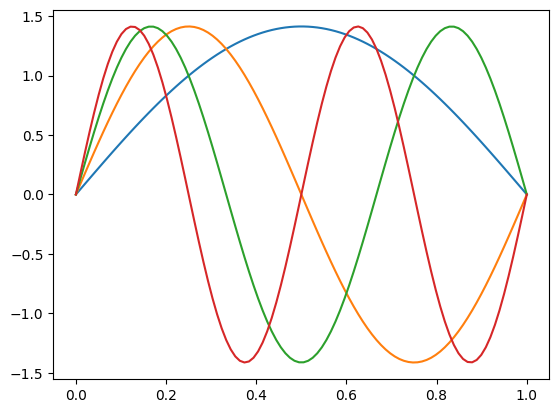

In [22]:
# plot a few eigenstates
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt
L = 1
x_space = np.linspace(0, L, 100)
# plot
fig, ax = plt.subplots()
ax.plot(x_space, [sqrt(2/L)*sin(pi/L*x) for x in x_space])
ax.plot(x_space, [sqrt(2/L)*sin(2*pi/L*x) for x in x_space])
ax.plot(x_space, [sqrt(2/L)*sin(3*pi/L*x) for x in x_space])
ax.plot(x_space, [sqrt(2/L)*sin(4*pi/L*x) for x in x_space]);

## Q 5.2
-------------
By tensor product, those states can be combined in the kets $|n_{\rm e}0_{\rm f}\rangle, |n_{\rm e}1_{\rm f}\rangle \in \mathcal{H}$ that include no photons or one photon, respectively.
We are next interested in the matrix element of the coupling term from the original Pauli-Fierz Hamiltonian that gives the transition probability between $|0_{\rm e}1_{\rm f}\rangle$ and $|n_{\rm e}0_{\rm f}\rangle$, i.e., between a single photon excitation and all possible electron excitations. For this, write down the term that only contains $\boldsymbol{\nabla}_{\boldsymbol{r}_l}$ and $\hat{\boldsymbol{A}}_\perp (\boldsymbol{r}_l)$ in the reduced setting. Then calculate the matrix element $\langle n_{\rm e}0_{\rm f}|\ldots|0_{\rm e}1_{\rm f}\rangle$.

## A 5.2
-------------
In the following, we ignore the constant prefactors in the coupling term. Note that $\langle 0_{\rm f}|\hat a^\dagger|1_{\rm f} \rangle = \langle 1_{\rm f}|\hat a|0_{\rm f}\rangle^* = 0$ and that the states factorize.
\begin{equation}
	\langle n_{\rm e}0_{\rm f}| \hat A(x) (-\mathrm{i}\hbar\partial_x) |0_{\rm e}1_{\rm f}\rangle \propto \langle n_{\rm e}|\exp(\mathrm{i} kx)\partial_x|0_{\rm e}\rangle \cdot \langle 0_{\rm f}|\hat a|1_{\rm f}\rangle
\end{equation}
From the $\hat A$ acting on the photon part of the system only the annihilator comes into play and naturally gives $\langle 0_{\rm f}|\hat a|1_{\rm f}\rangle = 1$. The matrix element in the electron subspace is
\begin{equation}
		\langle n_{\rm e}|\exp(\mathrm{i} kx)\partial_x|0_{\rm e}\rangle = \frac{2}{L} \int_0^L \sin\left(\frac{(n+1)\pi}{L}x\right)\exp\left(\mathrm{i} \frac{2\pi}{L} x\right) \partial_x \sin\left(\frac{\pi}{L}x\right) \mathrm{d} x = \ldots.
\end{equation}
SymPy seems have a hard time with this expression (Mathematica can easily solve it), so we just plot it.

In [69]:
from scipy import integrate
n_range = range(31)
# we need to separate real and imaginary parts for integrate.quad to use
sol_space_real = np.array([integrate.quad(lambda x: 2/L*sin((n+1)*pi/L*x)*cos(2*pi/L*x)*cos(pi/L*x)*pi/L, 0, L)[0] for n in n_range])
sol_space_imag = np.array([integrate.quad(lambda x: 2/L*sin((n+1)*pi/L*x)*sin(2*pi/L*x)*cos(pi/L*x)*pi/L, 0, L)[0] for n in n_range])
sol_space_abssq = np.square(sol_space_real) + np.square(sol_space_imag)

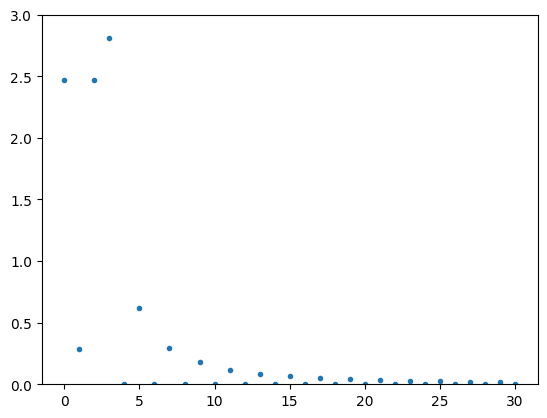

In [70]:
# plot
fig, ax = plt.subplots()
ax.plot(n_range, sol_space_abssq, '.')
ax.set_ylim(0, 3);

So far, this is nothing totally unexpected: a photon gets absorbed and the electron goes over into an excited state. We note that the states with $n\geq 4$ and even are avoided in this transition. But when we check the momentum balance of this process, we note that the state $|0_{\rm e}1_{\rm f}\rangle$ has a non-zero momentum of $\hbar k$ (from the photon) while all $|n_{\rm e}0_{\rm f}\rangle$ have zero momentum (the eigenstates of an electron in a box all have zero momentum). Thus momentum conservation is broken by such a process! We can construct more such inconsistencies by looking at other terms that combine the photon and the matter part, e.g., the diamagnetic current $n(\boldsymbol{r} t)\boldsymbol{A}(\boldsymbol{r} t)$ where the different boundary conditions would clash as well.

## Q 5.3
-------------
Let's make the example even more striking by using the transition probability from Fermi's golden rule and summing up the total energy in the output channel.
Fermi's golden rule states that the transition probability from $|0_{\rm e}1_{\rm f}\rangle$ to $|n_{\rm e}0_{\rm f}\rangle$ per unit of time in first order approximation is
\begin{equation}
    \frac{2\pi}{\hbar} |\langle n_{\rm e}0_{\rm f}| \hat A(x) (-\mathrm{i}\hbar\partial_x) |0_{\rm e}1_{\rm f}\rangle|^2.
\end{equation}
Take the result from the previous calculation, multiply with the energy content of $|n_{\rm e}0_{\rm f}\rangle$, and sum over all possible $n$ to get an estimate for the total energy in the output channel.

## A 5.3
-------------

In [71]:
energy_space = [sol_space_abssq[n]*(n**2) for n in n_range]
# partial sums up to some index N
prob_partial_sum = [np.sum(sol_space_abssq[0:N]) for N in n_range]
energy_partial_sum = [np.sum(energy_space[0:N]) for N in n_range]

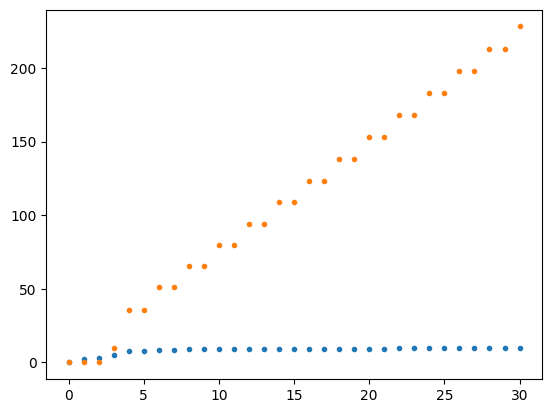

In [72]:
# plot
fig, ax = plt.subplots()
ax.plot(prob_partial_sum, '.')
ax.plot(energy_partial_sum, '.');

We see that while the total probability converges (as it should), the total energy diverges. This means energy in the output channel is **not conserved**!

## Q 5.4 Consistent boundary conditions

Let us next try with consistent boundary conditions, e.g., periodic boundary conditions for the matter part as well. So write down the $n$th excited state for the (uncoupled) particle including the ground state at $n=0$ in the position basis, $\langle \hat x|n_{\rm e}\rangle$. Then, calculate the matrix element between different electron states, $\langle m_{\rm e}|\exp(\mathrm{i} kx)\partial_x|n_{\rm e}\rangle$. Just determine for which values of $m,n \in \mathbb{N}_0$ they are zero or non-zero.

**Hint:** The limit $\sin(x)/x \to 1$ as $x\to 0$ can be used in this calculation.

## A 5.4

This state $|n_{\rm e}\rangle$ is the particle eigenstates of the momentum operator and simultaneously for the kinetic-energy operator.
\begin{align}
	&\langle \hat x | n_{\rm e}\rangle = \frac{1}{\sqrt{L}} \exp\left(-\mathrm{i} \frac{2\pi n}{L} x\right) \\
	&\langle m_{\rm e}|\exp(\mathrm{i} kx)\partial_x|n_{\rm e}\rangle = \frac{2}{L} \int_0^L \exp\left(-\mathrm{i} \frac{2\pi m}{L} x\right) \exp\left(\mathrm{i} \frac{2\pi}{L} x\right) \partial_x \exp\left(\mathrm{i} \frac{2\pi n}{L} x\right) \mathrm{d} x \left\{ \begin{array}{ll}
			\neq 0 & \text{if}\; m=n+1 \\
			= 0 & \text{else.} 
		\end{array}\right.
\end{align}

Consequently, there is a non-zero transition propbability only when the momentum of the absorbed photon exactly matches the momentum difference of the electron states. In other words, a transition between the state $\ket{n_{\rm e}}$ and $\ket{(n+1)_{\rm e}}$ is possible by absorption of one photon. We have thus reached momentum conservation only through **boundary value consistency** in the photon and matter realms.

We will show the result also numerically.

In [73]:
from cmath import exp
integrand = lambda n,m: lambda x: 2/L*exp(-1j*2*pi*m/L*x)*exp(1j*2*pi/L*x)*exp(1j*2*pi*n/L*x)*(1j*2*pi*m/L)
integrand_real = lambda n,m: lambda x: integrand(n,m)(x).real
integrand_imag = lambda n,m: lambda x: integrand(n,m)(x).imag
# we fix m and scan n
m = 4
n_range = range(31)
# we need to separate real and imaginary parts for integrate.quad to use
sol_space_real = np.array([integrate.quad(integrand_real(n,m), 0, L)[0] for n in n_range])
sol_space_imag = np.array([integrate.quad(integrand_imag(n,m), 0, L)[0] for n in n_range])
sol_space_abssq = np.square(sol_space_real) + np.square(sol_space_imag)

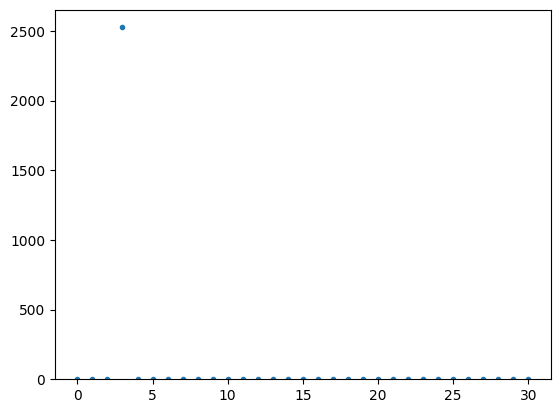

In [74]:
# plot
fig, ax = plt.subplots()
ax.plot(n_space, sol_space_abssq, '.');
ax.set_ylim(0);

In [75]:
# energy expectation values
energy_space = [sol_space_abssq[n]*(n**2) for n in n_range]
# partial sums up to some index N
prob_partial_sum = [np.sum(sol_space_abssq[0:N]) for N in n_range]
energy_partial_sum = [np.sum(energy_space[0:N]) for N in n_range]

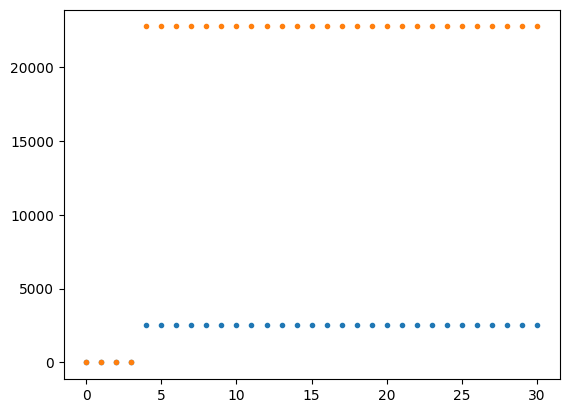

In [76]:
# plot
fig, ax = plt.subplots()
ax.plot(prob_partial_sum, '.')
ax.plot(energy_partial_sum, '.');

Here, the total probability and the total energy in the output channel converge.